# Demos for Lecture 4


In [57]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import entropy

import pandas as pd
import word2vec

import seaborn as sns

## KL-Divergence

In [21]:
p = [0.5, 0.5]
q = [0.2, 0.8]
r = [0.4, 0.6]

print(entropy(p,p))
print(entropy(p,q))
print(entropy(q,r))
print(entropy(r,p))
print(entropy(p,r))

0.0
0.22314355131420976
0.09151622184943578
0.020135513550688863
0.020410997260127586


## Cosine similarity

In [22]:
word2vec.word2phrase('./data/oliver_twist.txt','./data/oliver_twist_phrases',verbose=True)
word2vec.word2vec('./data/oliver_twist_phrases', './data/oliver_twist_model.bin', size=200, iter_=10, binary=True, verbose=True)
model = word2vec.load('./data/oliver_twist_model.bin')

Running command: word2phrase -train ./data/oliver_twist.txt -output ./data/oliver_twist_phrases -min-count 5 -threshold 100 -debug 2
Starting training using file ./data/oliver_twist.txt
Words processed: 100K     Vocab size: 77K  
Vocab size (unigrams + bigrams): 60511
Words in train file: 161090
Running command: word2vec -train ./data/oliver_twist_phrases -output ./data/oliver_twist_model.bin -size 200 -window 5 -sample 1e-3 -hs 0 -negative 5 -threads 12 -iter 10 -min-count 5 -alpha 0.025 -debug 2 -binary 1 -cbow 1
Starting training using file ./data/oliver_twist_phrases
Vocab size: 3582
Words in train file: 152774
Alpha: 0.000389  Progress: 99.46%  Words/thread/sec: 194.36k  

In [24]:
model.distance('hand','foot','hill','head')

[('hand', 'foot', 0.936983032947431),
 ('hand', 'hill', 0.9084316724777061),
 ('hand', 'head', 0.970601999717943),
 ('foot', 'hill', 0.9915577389164667),
 ('foot', 'head', 0.9089183089581929),
 ('hill', 'head', 0.8709062300162604)]

In [173]:
?word2vec.word2vec


## Regression

Here we generate our demo synthetic data.

In [31]:
N = 100
m = 12

X = np.random.rand(N,m+1)
X[:,m] = np.repeat(1,N)
beta = np.random.rand(m+1,1)
y = np.matmul(X,beta).reshape(N) + np.random.normal(0.0,0.1,N)

# plt.scatter(X[:,0],y)

This is the ordinary linear regression:

In [32]:
model1 = LinearRegression()
model1.fit(X,y)

np.linalg.norm(np.append(model1.coef_,[model1.intercept_])- beta)

6.379694961897935

This is the ridge regression model.

In [33]:
model2 = Ridge()
model2.fit(X,y)

np.linalg.norm(np.append(model2.coef_,[model2.intercept_])- beta)

6.030622222558229

This is lasso regression model.

In [34]:
model3 = Lasso()
model3.fit(X,y)

np.linalg.norm(np.append(model3.coef_,[model3.intercept_])- beta)

13.786744497408556

And finally elastic net model.

In [35]:
model4 = ElasticNet()
model4.fit(X,y)

np.linalg.norm(np.append(model4.coef_,[model4.intercept_])- beta)

13.786744497408556

Now, let us develop a regression model on a real dataset. This dataset is culled from UCI. Here is the [link](https://archive.ics.uci.edu/ml/datasets/Residential+Building+Data+Set)

In [36]:
data = pd.read_excel('./data/Residential-Building-Data-Set.xlsx', header=0)
data

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,...,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.00,601988.1,2200,410
1,84,1,89,4,1,7600.0,1140.0,3040.0,400,963.81,...,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.00,929027.1,5000,1000
2,78,1,81,4,1,4800.0,840.0,480.0,100,689.84,...,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.00,377828.6,1200,170
3,72,2,73,2,1,685.0,202.0,13.7,20,459.54,...,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.00,122031.7,165,30
4,87,1,90,2,1,3000.0,800.0,1230.0,410,631.91,...,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.00,1734973.5,5500,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,83,4,86,1,20,1350.0,350.0,108.0,80,251.37,...,1176.50,8343.60,8382.0,87.27,85.56,10555.47,33626.25,865878.9,1100,150
368,81,2,82,4,20,600.0,150.0,36.0,60,299.55,...,815.50,1755.00,8013.0,62.78,56.45,3387.72,10646.75,606524.2,740,80
369,84,4,86,3,20,1900.0,430.0,285.0,150,364.41,...,1584.30,8776.71,8799.0,101.00,101.89,13571.80,34474.50,1067772.0,860,220
370,82,3,84,4,20,510.0,160.0,30.6,60,245.28,...,909.20,7930.66,8004.0,73.57,69.26,4756.68,21855.00,669640.3,1100,110


Columns 6 to 107 are independent variables, and columns 108 and 109 are the dependent variables.

In [37]:
X = data.iloc[:,5:107]
y = data.iloc[:,108]

We will develop a linear regression and a ridge regression models below. `1.0 - model.score` gives us the value of the cost function on these models.

In [38]:
model = LinearRegression()
model.fit(X,y)
1.0 - model.score(X,y)

0.017899630500839314

In [39]:
model = Ridge()
model.fit(X,y)
1.0 - model.score(X,y)

0.017900290230078886

In [41]:
model = Lasso()
model.fit(X,y)
1.0 - model.score(X,y)

/home/kaygun/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.046e+05, tolerance: 9.812e+02
  model = cd_fast.enet_coordinate_descent(


0.019559377464268835

In [40]:
model = ElasticNet()
model.fit(X,y)
1.0 - model.score(X,y)

/home/kaygun/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.170e+05, tolerance: 9.812e+02
  model = cd_fast.enet_coordinate_descent(


0.020002795785482363

In [45]:
data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [71]:
X = data.iloc[:,0:8]
y = data.iloc[:,8]

model = ElasticNet()
model.fit(X,y)

model.score(X,y)

0.6153801793305094

<AxesSubplot:>

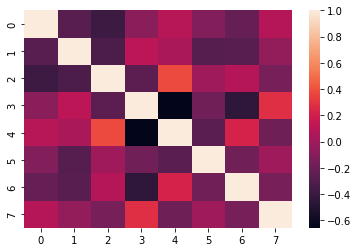

In [59]:
cor = np.corrcoef(X.transpose())
sns.heatmap(cor)

In [68]:
Xnew = X.iloc[:,[0,7]]
modelNew = Lasso()
modelNew.fit(Xnew,y)
modelNew.score(Xnew,y)

0.3313879831972055

## k-means

For this part of the notes we are using [this](https://archive.ics.uci.edu/ml/datasets/Travel+Reviews) dataset.

In [72]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00484/tripadvisor_review.csv')
X = data.iloc[:,1:10]
X

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9
0,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82
1,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86
2,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31
3,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57
4,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18
...,...,...,...,...,...,...,...,...,...
975,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99
976,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34
977,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34
978,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12


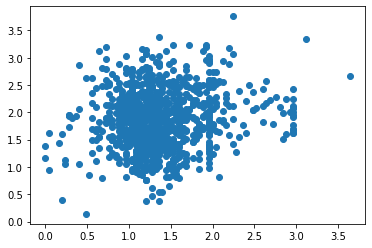

In [93]:
plt.scatter(X.iloc[:,1],X.iloc[:,5])

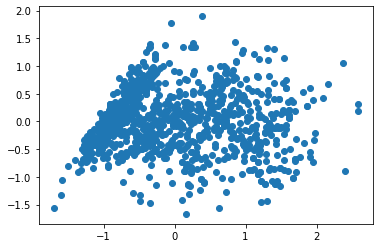

In [84]:
model = PCA(n_components=2)
Xn = model.fit_transform(X)
plt.scatter(Xn[:,0],Xn[:,1])

In [91]:
model = KMeans(n_clusters=2)
model.fit(X)
classes = model.predict(X)
project = PCA(n_components=2)
Z = project.fit_transform(X)

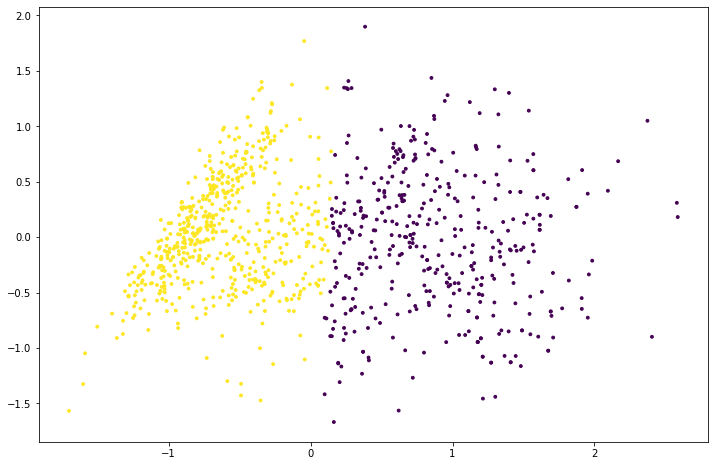

In [92]:
plt.figure(figsize=(12,8))
plt.scatter(Z[:,0],Z[:,1],c=classes,s=8.0)